In [1]:
import pandas as pd
import numpy as np
from statistics import mode
import statsmodels.api as sm
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load modified file with some pre-processing completed
df = pd.read_csv("diabetes_data_preprocessed.csv", index_col=0)
df.shape

(100120, 47)

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,0,0,0,1,1,1,1,1,0,0
age,1,2,3,4,5,6,7,8,9,10
admission_type_id,5,1,1,1,1,1,3,1,1,3
discharge_disposition_id,18,1,1,1,1,1,1,1,1,2
admission_source_id,1,7,7,7,7,1,1,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
num_lab_procedures,41,59,11,44,51,31,70,73,68,33


In [4]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol',
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed',
          'age', 'A1Cresult', 'max_glu_serum', 'diag_1', 'diag_2', 'diag_3']

df[i] = df[i].astype('object')

In [5]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [6]:
L1 = np.random.randint(1,10, 20)
L2 = np.random.randint(1,20, 20)

datframe = pd.DataFrame()
datframe['L1'] = L1
datframe['L2'] = L2

In [7]:
datframe.corr()

,L1,L2
L1,1.000000,0.241705
L2,0.241705,1.000000


In [8]:
scaler = MinMaxScaler()
datframe = pd.DataFrame(scaler.fit_transform(datframe), columns = ['L1', 'L2'])
datframe.corr()

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,L1,L2
L1,1.000000,0.241705
L2,0.241705,1.000000


In [9]:
"""
This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as
the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes
interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that
information by treating it as a simple categorical variable.
"""

# convert age back to integer type
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     25564
7     22186
6     17102
9     16708
5      9626
4      3765
10     2669
3      1650
2       690
1       160
Name: age, dtype: int64
75    25564
65    22186
55    17102
85    16708
45     9626
35     3765
95     2669
25     1650
15      690
5       160
Name: age, dtype: int64


In [9]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [10]:
num_col

['number_outpatient',
 'number_diagnoses',
 'number_emergency',
 'number_inpatient',
 'num_lab_procedures',
 'num_meds',
 'num_procedures',
 'numchange',
 'time_in_hospital',
 'num_medications']

In [11]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value (2)

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [12]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,number_outpatient,8.818291,148.558544,1.263973,Yes,log1p,2.733914,7.804218,0.429394
1,number_diagnoses,-0.867785,-0.109005,1.938211,No,NA,-0.867785,-0.109005,1.938211
2,number_emergency,22.842251,1185.246374,0.935517,Yes,log1p,3.661064,16.276610,0.315405
3,number_inpatient,3.626402,20.833542,1.261825,Yes,log1p,1.450492,1.405364,0.510433
4,num_lab_procedures,-0.241491,-0.253099,19.620228,No,NA,-0.241491,-0.253099,19.620228
5,num_meds,0.675116,0.277244,0.921620,No,NA,0.675116,0.277244,0.921620
6,num_procedures,1.326020,0.890773,1.700335,No,NA,1.326020,0.890773,1.700335
7,numchange,1.425310,1.433619,0.487858,No,NA,1.425310,1.433619,0.487858
8,time_in_hospital,1.137931,0.871189,2.974528,No,NA,1.137931,0.871189,2.974528
9,num_medications,1.333039,3.523472,8.092612,No,NA,1.333039,3.523472,8.092612


In [16]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [17]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

In [18]:
df.shape

(100120, 47)

In [19]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [20]:
numerics

['number_diagnoses',
 'num_lab_procedures',
 'number_inpatient_log1p',
 'num_meds',
 'num_procedures',
 'numchange',
 'time_in_hospital',
 'number_emergency_log1p',
 'num_medications',
 'number_outpatient_log1p']

In [21]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                   int64
pioglitazone                

In [22]:
df.A1Cresult.value_counts()

-99    83243
 1     11935
 0      4942
Name: A1Cresult, dtype: int64

In [23]:
dfcopy = df.copy(deep = True)

In [24]:
df = dfcopy.copy(deep = True)

In [25]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [26]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,num_meds,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
0,2278392,8222157,Caucasian,0,1,5,18,1,1,41,...,0,0,0,0,0,0,0,0.000000,0.0,0.000000
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,0,0,1,1,0,1,1,0.000000,0.0,0.000000
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,0,0,0,1,0,0,1,1.098612,0.0,0.693147
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,0,0,1,1,0,1,1,0.000000,0.0,0.000000
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,0,0,1,1,0,0,2,0.000000,0.0,0.000000


####  search for variables that are interdependent

In [29]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [30]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [31]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,1,1,1
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8


### Scaling applied to df; using df2 from here

In [1]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

NameError: name 'pd' is not defined

In [33]:
# Logical order: duplicate removal, then outlier removal followed by scaling

In [34]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(70442, 56)

In [35]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [36]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [37]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# my_cmap = ListedColormap(sns.color_palette("RdYlGn", n_colors=15).as_hex())
# my_cmap = ListedColormap(sns.diverging_palette(150, 250, sep=120, n=28, center="light").as_hex())

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# drop some columns due to their means is round to 0
# table = df.drop(['acetohexamide','tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','patient_nbr', 'encounter_id', 'service_utilization_log1p'], axis = 1).corr(method='pearson')
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

/usr/local/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [38]:
pd.options.display.max_rows = 400

c = df2.corr().abs()
s = c.unstack()
print(s.shape)
so = s.sort_values(ascending=False)

so[38:120]

(2025,)


pioglitazone                         pioglitazone                           1.000000
rosiglitazone                        rosiglitazone                          1.000000
change|num_medications               change|num_medications                 1.000000
tolazamide                           tolazamide                             1.000000
encounter_id                         encounter_id                           1.000000
time_in_hospital                     number_diagnoses|time_in_hospital      0.935273
number_diagnoses|time_in_hospital    time_in_hospital                       0.935273
numchange                            num_medications|numchange              0.897605
num_medications|numchange            numchange                              0.897605
num_medications|number_diagnoses     num_medications                        0.895027
num_medications                      num_medications|number_diagnoses       0.895027
num_medications|num_procedures       num_procedures              

In [40]:
df2['diag_1'] = df2['diag_1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_1'], drop_first = True)

In [41]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_1' ]

In [42]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['number_diagnoses',
 'nateglinide',
 'num_medications|time_in_hospital',
 'number_inpatient_log1p',
 'glipizide',
 'time_in_hospital',
 'change|num_medications',
 'miglitol',
 'glyburide-metformin',
 'glyburide',
 'number_diagnoses|time_in_hospital',
 'diabetesMed',
 'num_medications|num_lab_procedures',
 'numchange',
 'repaglinide',
 'number_emergency_log1p',
 'pioglitazone',
 'metformin-pioglitazone',
 'num_medications|numchange',
 'metformin-rosiglitazone',
 'encounter_id',
 'num_lab_procedures',
 'patient_nbr',
 'glimepiride-pioglitazone',
 'acetohexamide',
 'tolbutamide',
 'rosiglitazone',
 'chlorpropamide',
 'num_medications|num_procedures',
 'num_medications|number_diagnoses',
 'acarbose',
 'tolazamide',
 'num_medications',
 'insulin',
 'glipizide-metformin',
 'time_in_hospital|num_lab_procedures',
 'A1Cresult',
 'troglitazone',
 'num_meds',
 'num_procedures',
 'glimepiride',
 'metformin',
 'number_outpatient_log1p']

In [43]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

# new_non_num_cols

In [44]:
new_non_num_cols

['race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'diag_1_1.0',
 'diag_1_2.0',
 'diag_1_3.0',
 'diag_1_4.0',
 'diag_1_5.0',
 'diag_1_6.0',
 'diag_1_7.0',
 'diag_1_8.0']

In [45]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [46]:
#### save final dataset to csv
df_pd.to_csv('data_final.csv', index=0)

### Modeling

In [51]:
feature_set_1 = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'diag_1_1.0', 'diag_1_2.0', 'diag_1_3.0', 'diag_1_4.0',
                 'diag_1_5.0','diag_1_6.0', 'diag_1_7.0', 'diag_1_8.0']

In [95]:
feature_set_2 = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                 'number_diagnoses', 'num_meds', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
                 'race_Other', 'gender_1', 'A1Cresult_0', 'A1Cresult_1', 'admission_type_id_3', 'admission_type_id_4',
                 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_8', 'admission_source_id_9', 'admission_source_id_11',
                 'numchange', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'diag_1_1.0', 'diag_1_2.0', 'diag_1_3.0', 'diag_1_4.0',
                 'diag_1_5.0','diag_1_6.0', 'diag_1_7.0', 'diag_1_8.0']

## Applying Feature Set 1 (detailed)

In [53]:
train_input = df_pd[feature_set_1]
train_output = df_pd['readmitted']

In [54]:
df_pd['readmitted'].value_counts()

0    56979
1     5220
Name: readmitted, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input, train_output, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True, penalty='l1')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Validation Score: 91.61%


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Dev Set score: 91.61%


In [56]:
Y_dev_predict = logreg.predict(X_dev)

In [57]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,1608,1608
1,172,172
All,1780,1780


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy is 0.92
Precision is 0.00
Recall is 0.00
AUC is 0.50


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 56979, 1: 5220})
New dataset shape Counter({0: 56979, 1: 56979})


In [60]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True, penalty='l1')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Validation Score: 61.45%


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Dev Set score: 61.82%


In [56]:
Y_dev_predict = logreg.predict(X_dev)

In [57]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,7666,3602,11268
1,5131,6192,11323
All,12797,9794,22591


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_logreg = accuracy_score(Y_dev, Y_dev_predict)
precision_logreg = precision_score(Y_dev, Y_dev_predict)
recall_logreg = recall_score(Y_dev, Y_dev_predict)
auc_logreg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.94
Precision is 0.98
Recall is 0.90
AUC is 0.94


In [62]:
import statsmodels.api as sm
logit = sm.Logit(Y_train, X_train)

result = logit.fit()

print(result.summary())
logit_coefs = pd.DataFrame(result.params)
logit_coefs.reset_index(inplace=True)
logit_coefs.columns = ["Feature", "Coefficient"]
logit_pvals = pd.DataFrame(result.pvalues)
logit_pvals.reset_index(inplace=True)
logit_pvals.columns = ["Feature", "pVal"]

logit_coefs = logit_coefs.merge(logit_pvals, how="inner", on=["Feature"])
logit_coefs = logit_coefs[logit_coefs.pVal <0.01]
logit_coefs.sort_values(by='Coefficient', ascending=False)

Optimization terminated successfully.
         Current function value: 0.662890
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                91166
Model:                          Logit   Df Residuals:                    91109
Method:                           MLE   Df Model:                           56
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:                 0.04365
Time:                        22:22:10   Log-Likelihood:                -60433.
converged:                       True   LL-Null:                       -63191.
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
age                                     0.2624      0.017 

,Feature,Coefficient,pVal
31,discharge_disposition_id_10,2.204907,8.895916e-16
29,discharge_disposition_id_2,0.866609,0.000000e+00
7,number_diagnoses,0.658419,1.219203e-80
9,repaglinide,0.416118,1.440762e-10
32,discharge_disposition_id_18,0.401860,3.765821e-30
30,discharge_disposition_id_7,0.302038,1.947978e-03
0,age,0.262438,2.492197e-52
6,number_inpatient_log1p,0.229774,1.157292e-95
1,time_in_hospital,0.223434,5.441356e-08
49,diag_1_1.0,0.199097,1.793028e-17


## Decision Tree classifier for Q2 (Complex model)

In [106]:
feature_set_1_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 
                 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 
                 'admission_source_id_9', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 'diag_1_1.0',
                 'diag_1_2.0',
                 'diag_1_3.0',
                 'diag_1_4.0',
                 'diag_1_5.0',
                 'diag_1_6.0',
                 'diag_1_7.0',
                 'diag_1_8.0']

feature_set_2_no_int = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                 'number_diagnoses', 'num_meds', 'race_AfricanAmerican', 'race_Asian', 
                 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_8', 
                 'admission_source_id_9', 'admission_source_id_11', 'numchange', 
                 'A1Cresult_0', 'A1Cresult_1',
                 'diag_1_1.0',
                 'diag_1_2.0',
                 'diag_1_3.0',
                 'diag_1_4.0',
                 'diag_1_5.0',
                 'diag_1_6.0',
                 'diag_1_7.0',
                 'diag_1_8.0']

In [66]:
train_input = df_pd[feature_set_1_no_int]
train_output = df_pd['readmitted']
df_pd['readmitted'].value_counts()

0    56979
1     5220
Name: readmitted, dtype: int64

In [67]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 56979, 1: 5220})
New dataset shape Counter({0: 56979, 1: 56979})


In [68]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=10))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 91.07%
Dev Set score: 91.55%


In [69]:
Y_dev_predict = dte.predict(X_dev)

In [70]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10615,725,11340
1,1202,10250,11452
All,11817,10975,22792


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dte = accuracy_score(Y_dev, Y_dev_predict)
precision_dte = precision_score(Y_dev, Y_dev_predict)
recall_dte = recall_score(Y_dev, Y_dev_predict)
auc_dte = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.92
Precision is 0.93
Recall is 0.90
AUC is 0.92


                       Feature  Importance
42                  diag_1_3.0    0.005986
15                pioglitazone    0.006403
28         admission_type_id_5    0.006521
23              race_Caucasian    0.007109
41                  diag_1_2.0    0.008232
39                 A1Cresult_1    0.009914
14                   glyburide    0.010114
27         admission_type_id_3    0.010473
13                   glipizide    0.013530
34       admission_source_id_7    0.015532
8                    metformin    0.024571
40                  diag_1_1.0    0.024650
19                     insulin    0.025513
26                    gender_1    0.026860
2               num_procedures    0.049929
0                          age    0.056334
3              num_medications    0.071203
7             number_diagnoses    0.075642
29  discharge_disposition_id_2    0.091644
1             time_in_hospital    0.383262


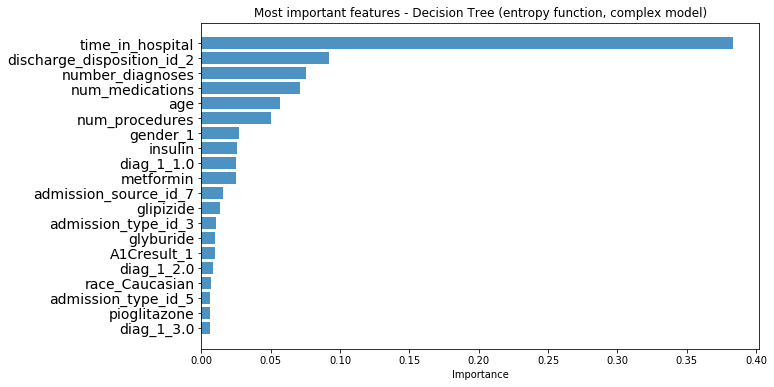

In [73]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (entropy function, complex model)')
plt.show()

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=28, criterion = "gini", min_samples_split=10)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtg, X_train, Y_train, cv=10))))
dtg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dtg.score(X_dev, Y_dev)))

Cross Validation Score: 91.17%
Dev Set score: 91.82%


In [75]:
Y_dev_predict = dtg.predict(X_dev)

In [76]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10672,668,11340
1,1196,10256,11452
All,11868,10924,22792


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dtg = accuracy_score(Y_dev, Y_dev_predict)
precision_dtg = precision_score(Y_dev, Y_dev_predict)
recall_dtg = recall_score(Y_dev, Y_dev_predict)
auc_dtg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.92
Precision is 0.94
Recall is 0.90
AUC is 0.92


## Random Forest - Q2 Complex model

In [78]:
train_input = df_pd[feature_set_1_no_int]
train_output = df_pd['readmitted']

# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 56979, 1: 5220})
New dataset shape Counter({0: 56979, 1: 56979})


In [79]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 93.88%
Dev Set score: 94.14%


In [80]:
Y_dev_predict = forrest.predict(X_dev)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11144,196,11340
1,1139,10313,11452
All,12283,10509,22792


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forreste = accuracy_score(Y_dev, Y_dev_predict)
precision_forreste = precision_score(Y_dev, Y_dev_predict)
recall_forreste = recall_score(Y_dev, Y_dev_predict)
auc_forreste = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.94
Precision is 0.98
Recall is 0.90
AUC is 0.94


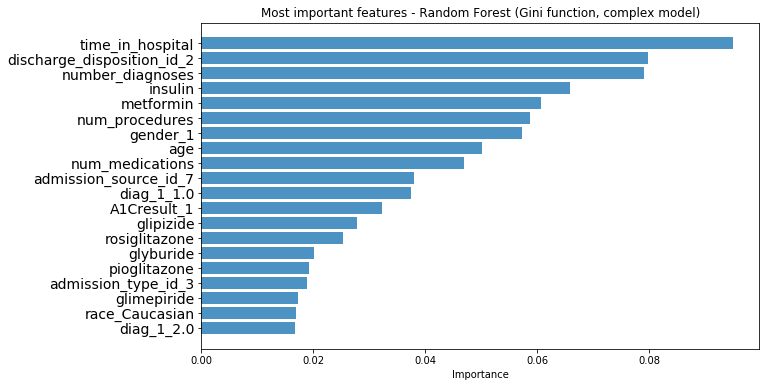

In [82]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (Gini function, complex model)')
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 93.95%
Dev Set score: 94.00%


In [84]:
Y_dev_predict = forrest.predict(X_dev)

In [85]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11131,209,11340
1,1159,10293,11452
All,12290,10502,22792


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forrestg = accuracy_score(Y_dev, Y_dev_predict)
precision_forrestg = precision_score(Y_dev, Y_dev_predict)
recall_forrestg = recall_score(Y_dev, Y_dev_predict)
auc_forrestg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.94
Precision is 0.98
Recall is 0.90
AUC is 0.94


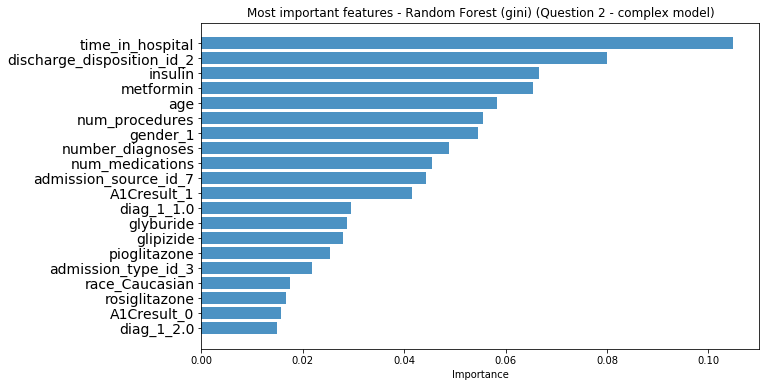

In [87]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (gini) (Question 2 - complex model)')
plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

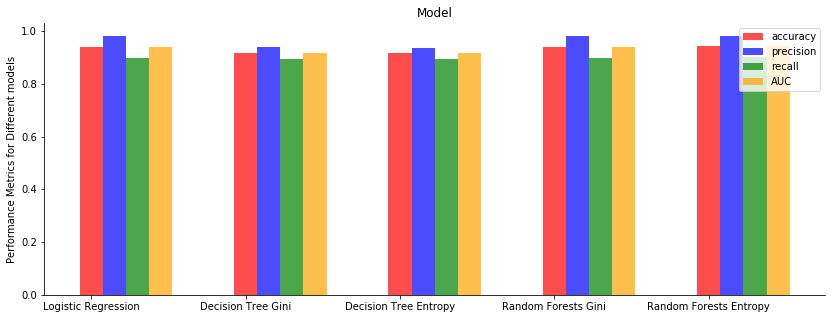

In [90]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

In [88]:
# coefs = [(x[2], x[1]) for x in sorted(zip(list(np.abs(logreg.coef_[0])), list(logreg.coef_[0]), list(train_input.columns)), reverse = True)]
# print("Logistic Regression Coefficients in decreasing order of coefficient values")
# coefs

In [91]:
impforrest = [(x[1], x[0]) for x in sorted(zip(list(forrest.feature_importances_), list(train_input.columns)), reverse = True)]
print("Random Forest Feature Importance in decreasing order")
impforrest = pd.DataFrame(impforrest, columns=["Feature","Importance"])
impforrest

Random Forest Feature Importance in decreasing order


,Feature,Importance
0,time_in_hospital,0.104841
1,discharge_disposition_id_2,0.079919
2,insulin,0.066660
3,metformin,0.065503
4,age,0.058327
5,num_procedures,0.055451
6,gender_1,0.054497
7,number_diagnoses,0.048865
8,num_medications,0.045532
9,admission_source_id_7,0.044293


In [92]:
coef_imp = logit_coefs.merge(impforrest, how = 'inner', on = ['Feature'])
coef_imp

,Feature,Coefficient,pVal,Importance
0,age,0.262438,2.492197e-52,0.058327
1,time_in_hospital,0.223434,5.441356e-08,0.104841
2,num_procedures,-0.104137,8.114330e-08,0.055451
3,number_outpatient_log1p,0.046563,5.041424e-05,0.006582
4,number_emergency_log1p,0.052991,1.302735e-06,0.003344
5,number_inpatient_log1p,0.229774,1.157292e-95,0.004942
6,number_diagnoses,0.658419,1.219203e-80,0.048865
7,metformin,-0.062503,2.686208e-03,0.065503
8,repaglinide,0.416118,1.440762e-10,0.002431
9,chlorpropamide,-1.025043,4.557305e-04,0.000101


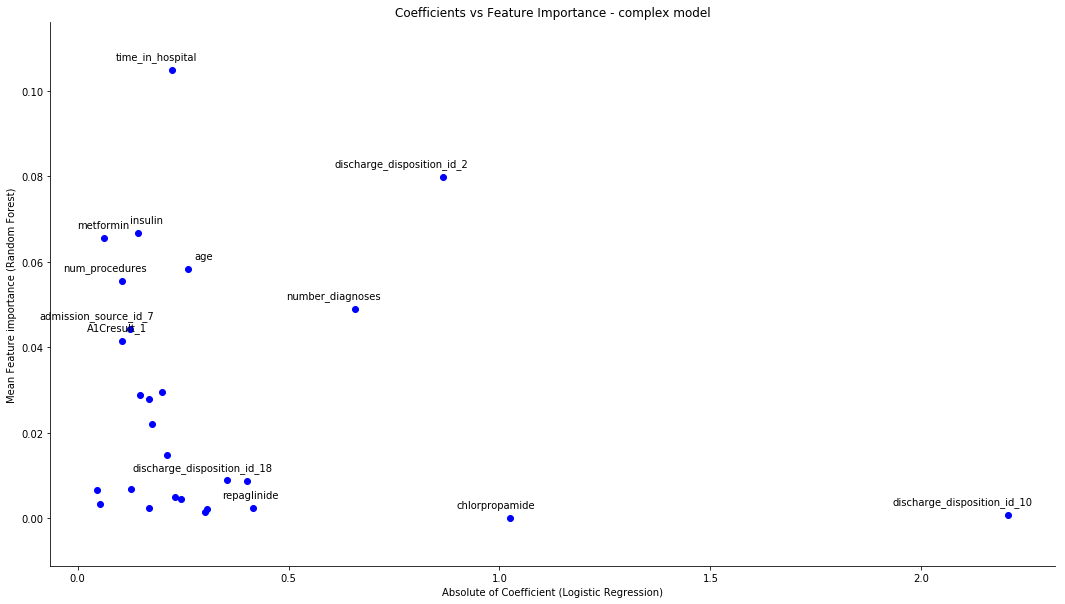

In [93]:
# plotting the absolute values of the coefficients from logistic regression with the feature importance from decision trees
plt.figure(figsize=(18, 10))
ax = plt.subplot(111)
x = coef_imp.Coefficient.abs()
y = coef_imp.Importance
plt.scatter(x, y, color = 'blue')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Absolute of Coefficient (Logistic Regression)")
plt.ylabel("Mean Feature importance (Random Forest)")
plt.title("Coefficients vs Feature Importance - complex model")

for label, m, n in zip(coef_imp.Feature, coef_imp.Coefficient.abs(), coef_imp.Importance):
    if (m>0.4) or (n>0.03):
        plt.annotate(label, xy=(m,n), xytext=(25, 8), textcoords='offset points', ha='right', va='bottom',)
plt.show()

## Feature set 2 - Logistic Regression - Simple model

In [96]:
train_input = df_pd[feature_set_2]
train_output = df_pd['readmitted']

In [97]:
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 56979, 1: 5220})
New dataset shape Counter({0: 56979, 1: 56979})


In [98]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Validation Score: 60.72%


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Dev Set score: 61.25%


In [101]:
import statsmodels.api as sm
logit2 = sm.Logit(Y_train, X_train)

result2 = logit2.fit()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result2.summary())
logit2_coefs = pd.DataFrame(result2.params)
logit2_coefs.reset_index(level=0, inplace=True)
logit2_coefs.columns = ["Feature", "Coefficient"]
logit2_pvals = pd.DataFrame(result2.pvalues)
logit2_pvals.reset_index(level=0, inplace=True)
logit2_pvals.columns = ["Feature", "pVal"]

logit2_coefs = logit2_coefs.merge(logit2_pvals, how="inner", on=["Feature"])
logit2_coefs = logit2_coefs[logit2_coefs.pVal <0.01]
logit2_coefs

         Current function value: 0.666388
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                91166
Model:                          Logit   Df Residuals:                    91122
Method:                           MLE   Df Model:                           43
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:                 0.03860
Time:                        22:33:31   Log-Likelihood:                -60752.
converged:                      False   LL-Null:                       -63191.
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
age                                     0.2737      0.017     15.901      0.000       0.240   

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,Feature,Coefficient,pVal
0,age,0.273714,6.265335e-57
1,time_in_hospital,0.242673,1.826117e-13
2,num_lab_procedures,0.073871,6.382662e-05
3,num_procedures,-0.103596,7.726173e-08
4,number_diagnoses,0.653874,5.505446e-80
5,num_meds,0.070262,2.872243e-10
10,race_Other,-0.248311,5.060289e-04
12,A1Cresult_0,-0.109318,1.063495e-03
13,A1Cresult_1,-0.147426,5.529485e-10
14,admission_type_id_3,-0.175258,3.021618e-12


In [103]:
Y_dev_predict = result2.predict(X_dev, linear=False)
Y_dev_predict = (Y_dev_predict > 0.5).astype(int)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1499,761,2260
1,1525,768,2293
All,3024,1529,4553


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_logreg = accuracy_score(Y_dev, Y_dev_predict)
precision_logreg = precision_score(Y_dev, Y_dev_predict)
recall_logreg = recall_score(Y_dev, Y_dev_predict)
auc_logreg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.61
Precision is 0.63
Recall is 0.55
AUC is 0.61


## Decision Tree for Q2 - Simple model

In [107]:
# using simple feature set with interaction terms removed for decision tree
train_input = df_pd[feature_set_2_no_int]
train_output = df_pd['readmitted']
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 56979, 1: 5220})
New dataset shape Counter({0: 56979, 1: 56979})


In [108]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=10))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 90.77%
Dev Set score: 91.09%


In [109]:
Y_dev_predict = dte.predict(X_dev)

In [110]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10613,727,11340
1,1303,10149,11452
All,11916,10876,22792


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dte = accuracy_score(Y_dev, Y_dev_predict)
precision_dte = precision_score(Y_dev, Y_dev_predict)
recall_dte = recall_score(Y_dev, Y_dev_predict)
auc_dte = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.91
Precision is 0.93
Recall is 0.89
AUC is 0.91


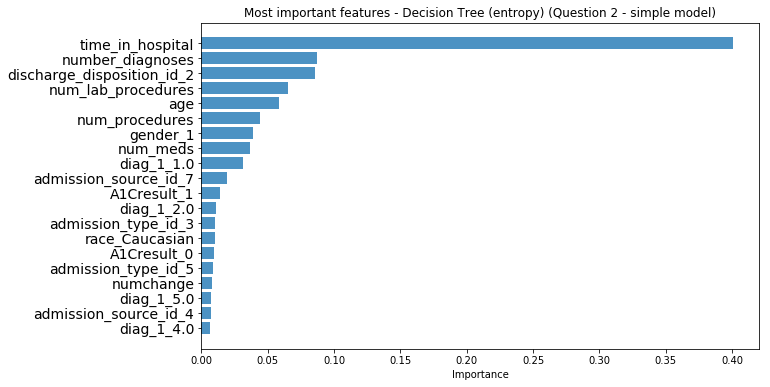

In [112]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (entropy) (Question 2 - simple model)')
plt.show()

In [113]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=28, criterion = "gini", min_samples_split=10)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtg, X_train, Y_train, cv=10))))
dtg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dtg.score(X_dev, Y_dev)))

Cross Validation Score: 91.15%
Dev Set score: 91.41%


In [114]:
Y_dev_predict = dtg.predict(X_dev)

In [115]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10638,702,11340
1,1255,10197,11452
All,11893,10899,22792


In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dtg = accuracy_score(Y_dev, Y_dev_predict)
precision_dtg = precision_score(Y_dev, Y_dev_predict)
recall_dtg = recall_score(Y_dev, Y_dev_predict)
auc_dtg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.91
Precision is 0.94
Recall is 0.89
AUC is 0.91


## Random Forest - Question 2 - Simple Model

In [117]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 93.57%
Dev Set score: 93.66%


In [118]:
Y_dev_predict = forrest.predict(X_dev)

In [119]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11108,232,11340
1,1213,10239,11452
All,12321,10471,22792


In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forreste = accuracy_score(Y_dev, Y_dev_predict)
precision_forreste = precision_score(Y_dev, Y_dev_predict)
recall_forreste = recall_score(Y_dev, Y_dev_predict)
auc_forreste = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.94
Precision is 0.98
Recall is 0.89
AUC is 0.94


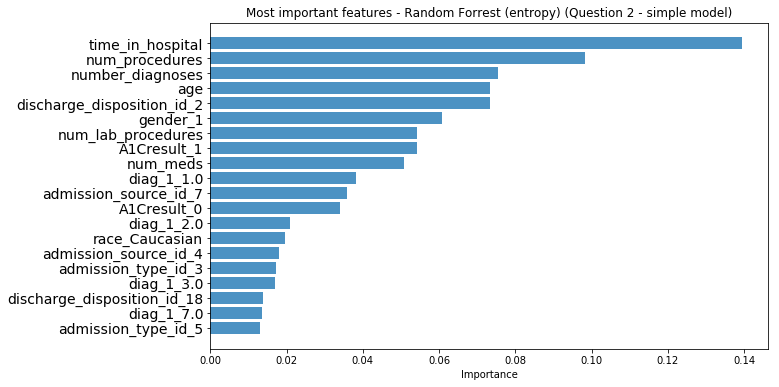

In [121]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forrest (entropy) (Question 2 - simple model)')
plt.show()

In [122]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=27, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 94.04%
Dev Set score: 93.98%


In [123]:
Y_dev_predict = forrest.predict(X_dev)

In [124]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11108,232,11340
1,1139,10313,11452
All,12247,10545,22792


In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forrestg = accuracy_score(Y_dev, Y_dev_predict)
precision_forrestg = precision_score(Y_dev, Y_dev_predict)
recall_forrestg = recall_score(Y_dev, Y_dev_predict)
auc_forrestg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.94
Precision is 0.98
Recall is 0.90
AUC is 0.94


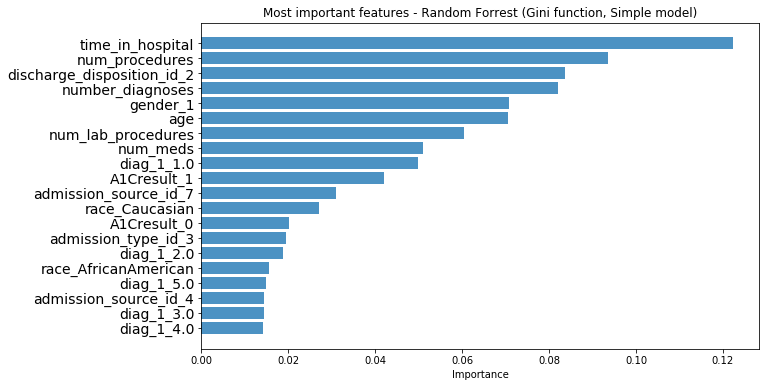

In [126]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forrest (Gini function, Simple model)')
plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

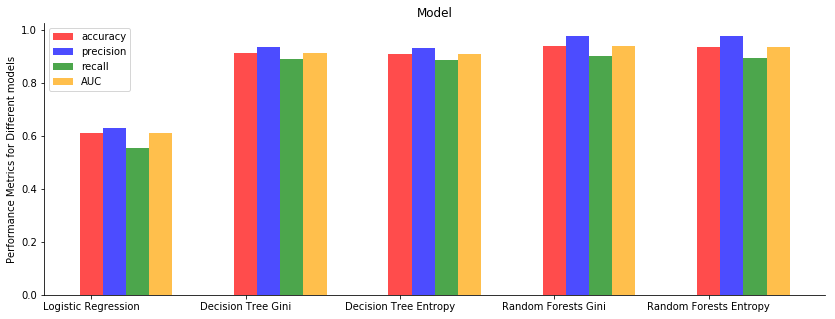

In [127]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()